# Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pickle

# Загрузка данных

In [27]:
df = pd.read_csv('../data/train.csv')
print("Размер датасета:", df.shape)

Размер датасета: (2000, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [3]:
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                   'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                   'sc_h', 'sc_w', 'talk_time']

nominal_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

target = 'price_range'

Датасет содержит 2000 записей и 21 признак, описывающий технические характеристики мобильных телефонов:

```battery_power``` — ёмкость батареи в мАч,

```blue``` — наличие Bluetooth,

```clock_speed``` — частота процессора,

```dual_sim``` — поддержка двух SIM-карт,

```fc``` и ```pc``` — мегапиксели фронтальной и основной камер,

```four_g```, ```three_g``` — поддержка 4G и 3G,

```int_memory``` — объём внутренней памяти,

```m_dep``` — толщина телефона в сантиметрах,

```mobile_wt``` — вес телефона,

```n_cores``` — количество ядер процессора,

```px_height``` и ```px_width``` — разрешение экрана по высоте и ширине в пикселях,

```ram``` — объем оперативной памяти в мегабайтах,

```sc_h``` и ```sc_w``` — высота и ширина экрана в сантиметрах,

```talk_time``` — максимальное время разговора от одного заряда батареи,

```touch_screen``` — сенсорный экран,

```wifi``` — наличие Wi-Fi.

Целевая переменная — ```price_range```, с категориями от 0 до 3, соответствующими бюджетному, низко-среднему, средне-высокому и премиум сегментам соответственно.


# Очистка данных

In [28]:
df = df[df['battery_power'] > 0]
df = df[df['clock_speed'] > 0]
df = df[df['int_memory'] > 0]
df = df[df['m_dep'] > 0]

df = df[df['mobile_wt'] > 50]
df = df[df['px_height'] >= 50]
df = df[df['px_width'] >= 20]
df = df[df['sc_w'] < df['sc_h']]

In [19]:
df.shape

(1935, 23)

В датасете было 65 невалидных записей 

# Анализ признаков для модели

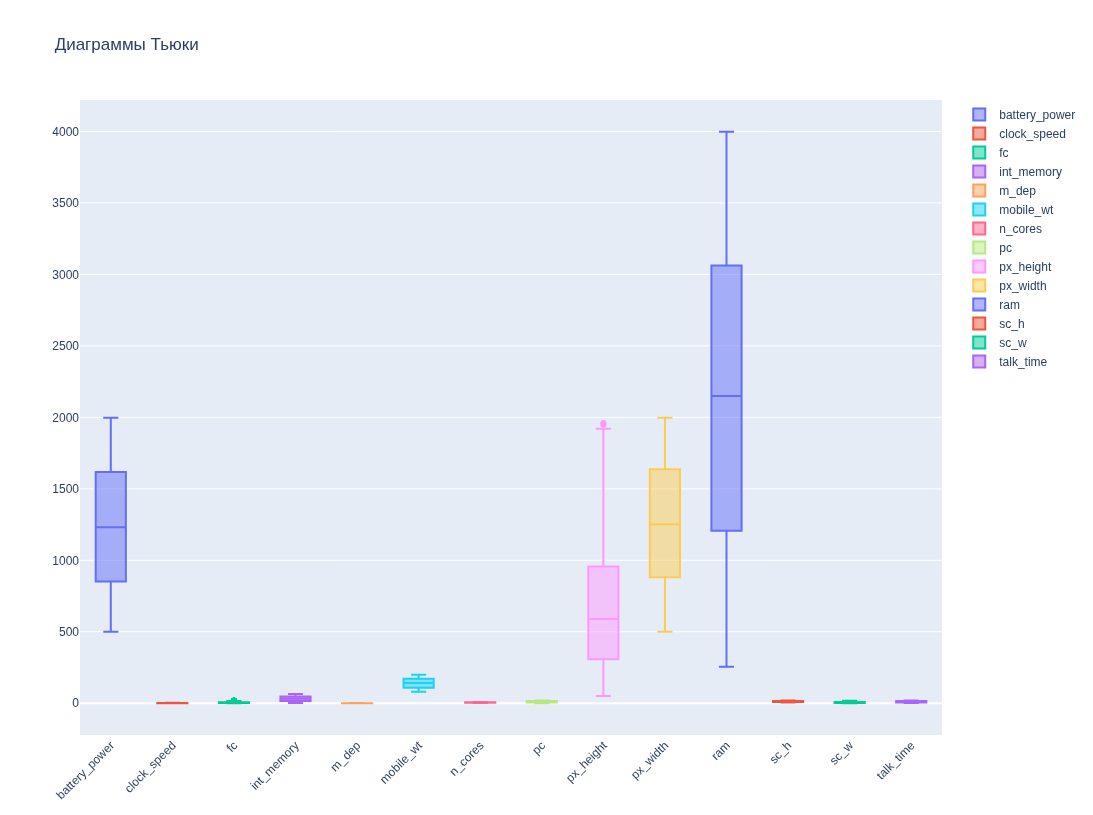

In [29]:
fig = go.Figure()

for col in numeric_features:
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(
    title='Диаграммы Тьюки',
    xaxis_tickangle=-45,
    width=1500,
    height=800
)

fig.write_image('numeric_features_boxplot.png')

fig.show()

**вывод**: 


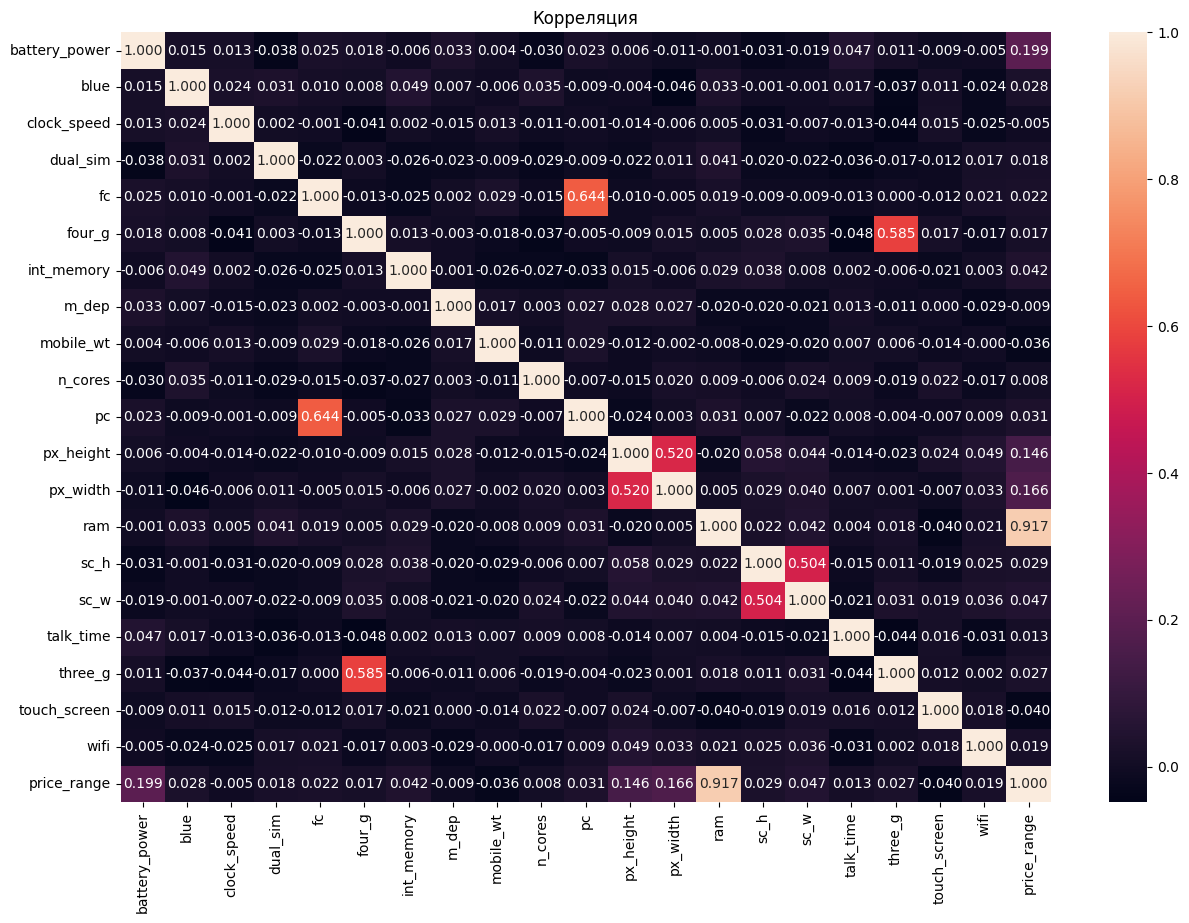

In [30]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f')
plt.title('Корреляция')
plt.savefig('correlation.png')
plt.show()

**вывод**:
Наибольшую корреляцию с ценой имеют RAM (0.917), battery_power (0.199), px_width (0.166) и px_height (0.146).

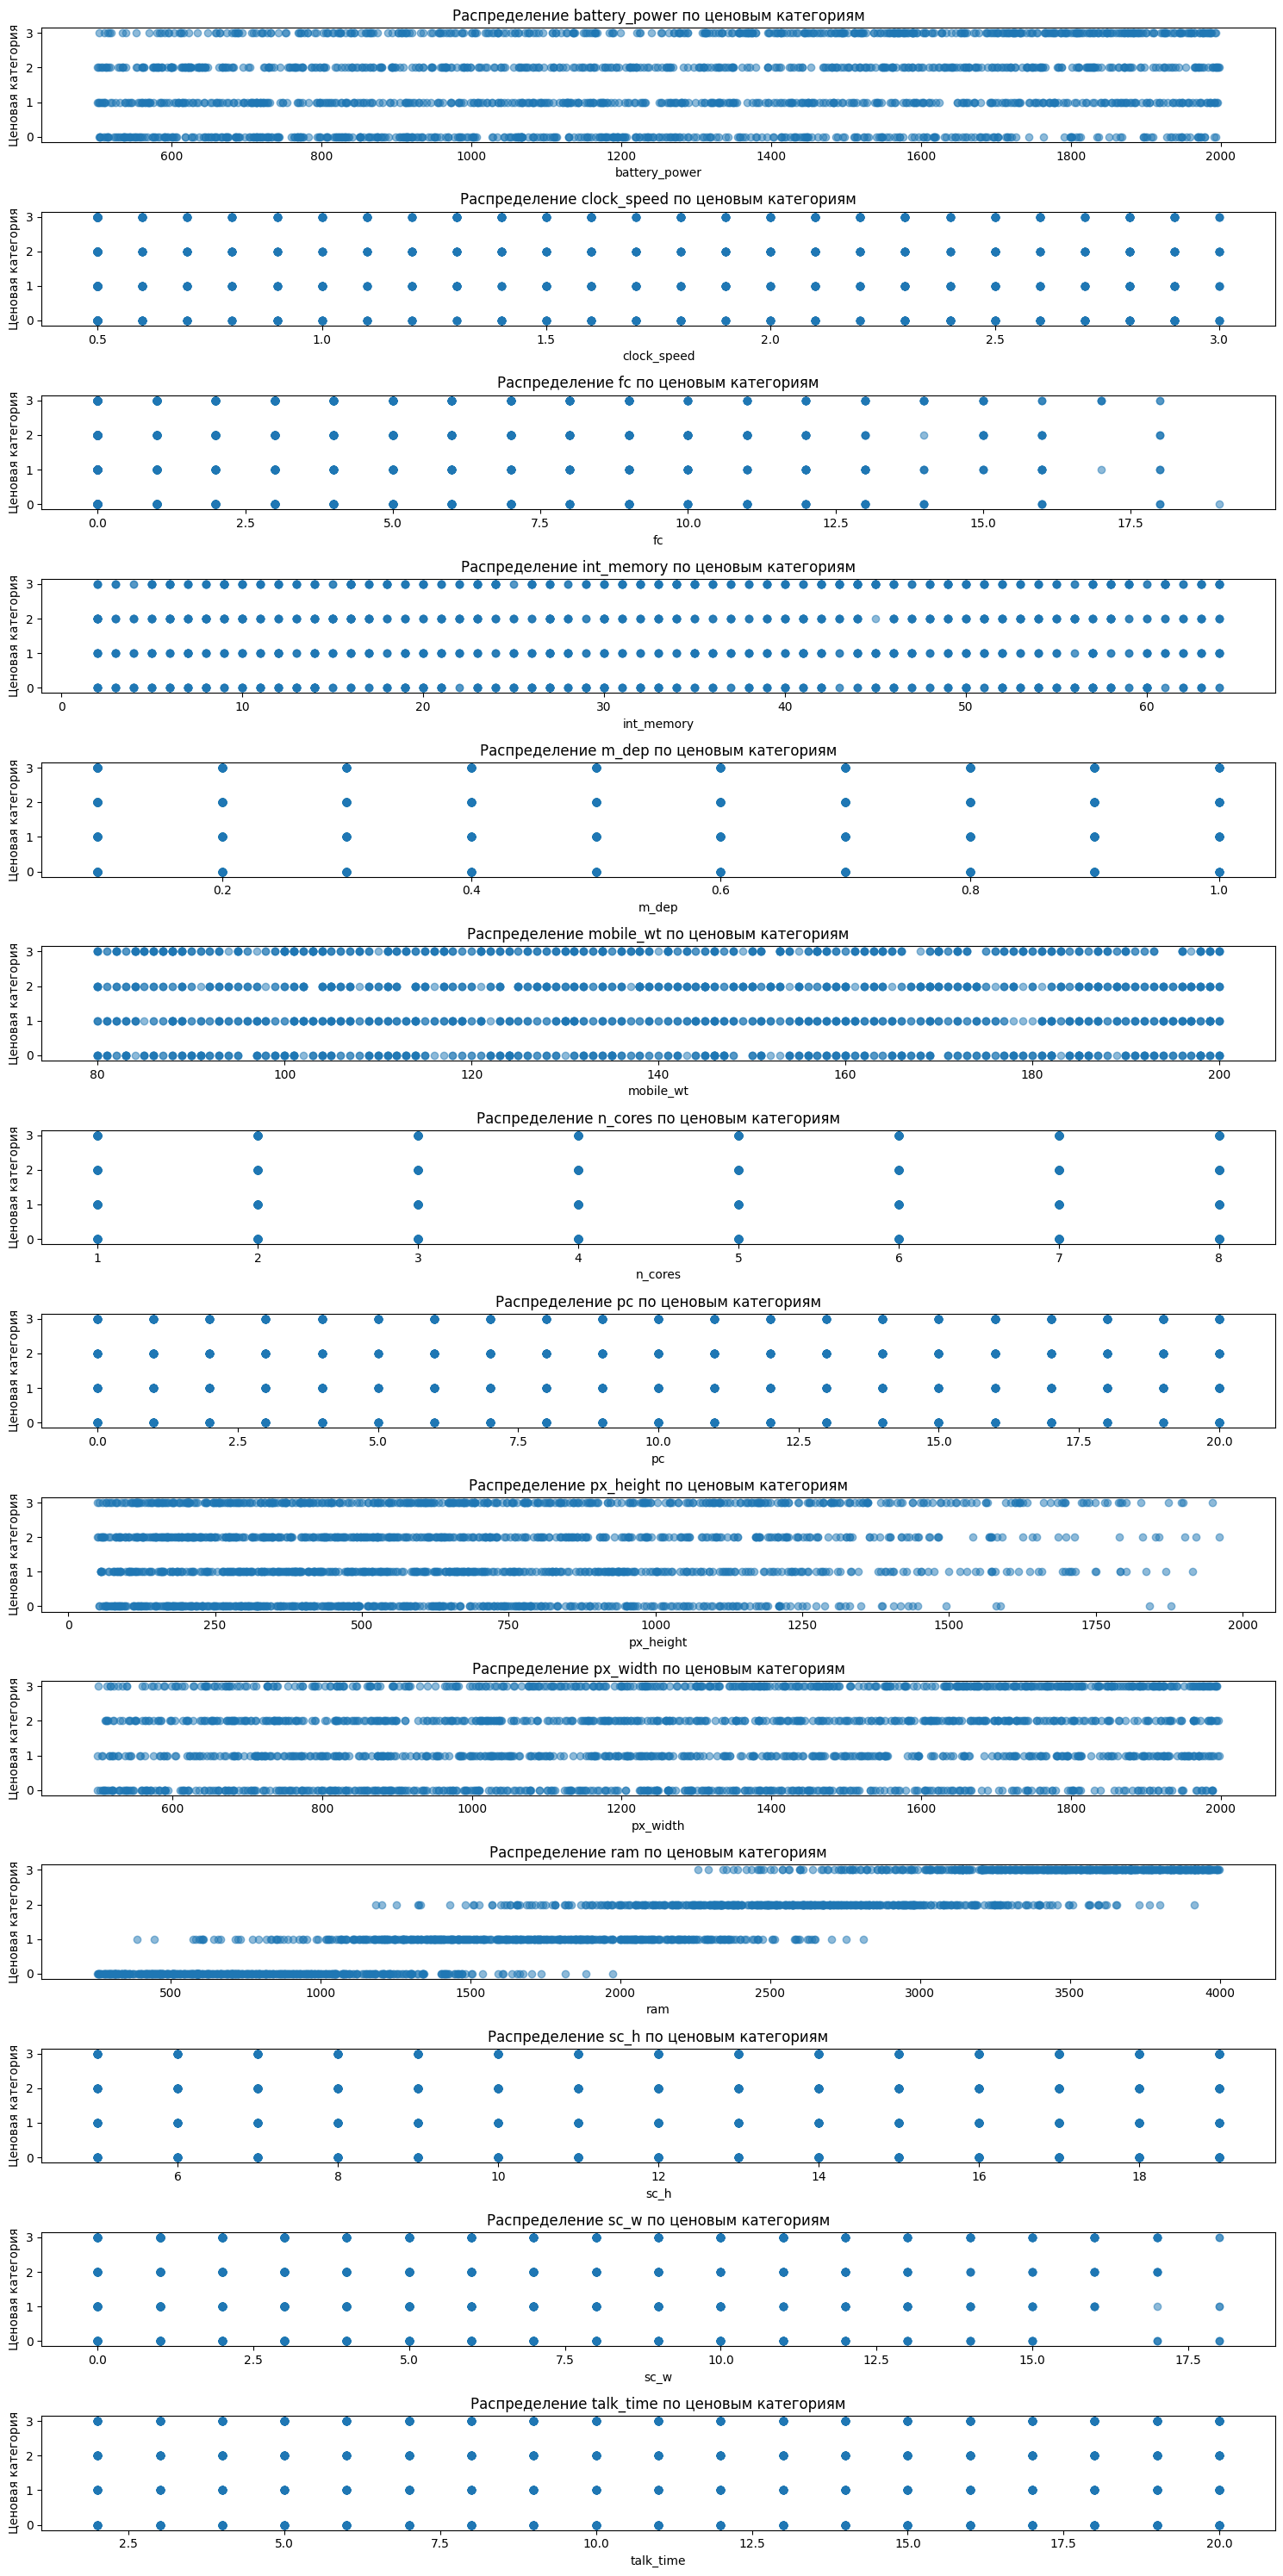

In [34]:
fig, axes = plt.subplots(14, 1, figsize=(15, 30))


for i, col in enumerate(numeric_features):
    axes[i].scatter(df[col], df['price_range'], alpha=0.5)
    axes[i].set_title(f'Распределение {col} по ценовым категориям')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Ценовая категория')

plt.tight_layout()
plt.savefig('boxplots_per_feature.png')
plt.show()



**вывод**: признаки clock_speed, fc, int_memory, m_deep, n_cores, sc_h, sc_w, talk_time зрительно не различимы и не имеют корреляции с целевой переменной, и могут быть исключены из рассмотрения.

In [36]:
df = df.drop(['clock_speed', 'fc', 'int_memory', 'm_dep', 'n_cores', 'sc_h', 'sc_w', 'talk_time'], axis=1)
df

,battery_power,blue,dual_sim,four_g,mobile_wt,pc,px_height,px_width,ram,three_g,touch_screen,wifi,price_range
1,1021,1,1,1,136,6,905,1988,2631,1,1,0,2
2,563,1,1,1,145,6,1263,1716,2603,1,1,0,2
3,615,1,0,0,131,9,1216,1786,2769,1,0,0,2
4,1821,1,0,1,141,14,1208,1212,1411,1,1,0,1
5,1859,0,1,0,164,7,1004,1654,1067,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,1,106,14,1222,1890,668,1,1,0,0
1996,1965,1,1,0,187,3,915,1965,2032,1,1,1,2
1997,1911,0,1,1,108,3,868,1632,3057,1,1,0,3
1998,1512,0,0,1,145,5,336,670,869,1,1,1,0


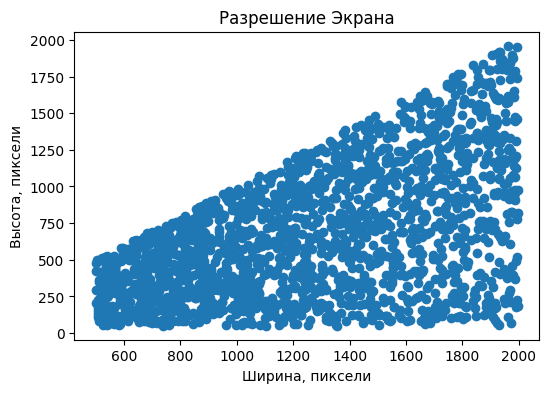

In [26]:
plt.figure(figsize=(6, 4))
plt.scatter(df['px_width'], df['px_height'])
plt.title('Разрешение Экрана')
plt.ylabel('Высота, пиксели')
plt.xlabel('Ширина, пиксели')
plt.savefig('screen_resolution.png')
plt.show()

# Сохранение датасета

In [37]:
with open('../data/clean_data.pkl', 'wb') as f:
    pickle.dump(df, f)